<a href="https://colab.research.google.com/github/mukul-mschauhan/classification/blob/main/Healthcare_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes **health camps** in several cities with **low work life balance.** They reach out to working people and ask them to **register for these health camps**. For those who attend, MedCamp provides them facility to undergo **health checks** or **increase awareness by visiting various stalls** (depending on the format of camp).

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between **“Registration” and Number of people taking tests at the Camps.** In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.


The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.


Other things to note:
Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The **first and second format provides people with an instantaneous health score.** The third format provides **information about several health issues through various awareness stalls.**
#### Favorable outcome:

For the first 2 formats, **a favourable outcome is defined as getting a health_score**, while in the third format it is defined as **visiting at least a stall.**

You need to predict the **chances (probability) of having a favourable outcome.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/test_l0Auv8Q.csv")
fhc = pd.read_csv("/content/First_Health_Camp_Attended.csv")
shc = pd.read_csv("/content/Second_Health_Camp_Attended.csv")
thc = pd.read_csv("/content/Third_Health_Camp_Attended.csv")
patient = pd.read_csv("/content/Patient_Profile.csv")
health_camp = pd.read_csv("/content/Health_Camp_Detail.csv")

We will combine train and test and then map all the remaining data with combined data.

In [ ]:
combined = pd.concat([train, test], ignore_index=True)
train.shape, test.shape, combined.shape

((75278, 8), (35249, 8), (110527, 8))

In [ ]:
combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')

In [ ]:
thc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [ ]:
# Patient Data
combined = pd.merge(combined, patient,
                    on=['Patient_ID'], how='left')
# First Health Camp
combined = pd.merge(combined, fhc,
                    on=['Patient_ID', 'Health_Camp_ID'], how='left')
# Second Health Camp
combined = pd.merge(combined, shc,
                    on=['Patient_ID', 'Health_Camp_ID'], how='left')
#Third Health Camp
combined = pd.merge(combined, thc,
                    on=['Patient_ID', 'Health_Camp_ID'], how='left')
#Health Camp
combined = pd.merge(combined, health_camp,
                    on=['Health_Camp_ID'], how='left')

In [ ]:
del health_camp, fhc, shc, thc, patient

In [ ]:
pd.set_option('display.max_columns', 50)
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [ ]:
combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Donation',
       'Health_Score', 'Unnamed: 4', 'Health Score', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number', 'Camp_Start_Date', 'Camp_End_Date',
       'Category1', 'Category2', 'Category3'],
      dtype='object')

In [ ]:
# 'Registration_Date', 'First_Interaction', 'Camp_Start_Date', 'Camp_End_Date'
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 110527 non-null  int64  
 1   Health_Camp_ID             110527 non-null  int64  
 2   Registration_Date          110193 non-null  object 
 3   Var1                       110527 non-null  int64  
 4   Var2                       110527 non-null  int64  
 5   Var3                       110527 non-null  int64  
 6   Var4                       110527 non-null  int64  
 7   Var5                       110527 non-null  int64  
 8   Online_Follower            110527 non-null  int64  
 9   LinkedIn_Shared            110527 non-null  int64  
 10  Twitter_Shared             110527 non-null  int64  
 11  Facebook_Shared            110527 non-null  int64  
 12  Income                     29185 non-null   float64
 13  Education_Score            12

In [ ]:
combined["Registration_Date"]=  \
pd.to_datetime(combined.Registration_Date,dayfirst=True)

combined["First_Interaction"]=  \
pd.to_datetime(combined.First_Interaction,dayfirst=True)

combined["Camp_Start_Date"]=  \
pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)

combined["Camp_End_Date"]=  \
pd.to_datetime(combined.Camp_End_Date,dayfirst=True)

In [ ]:
# regd vs Interaction
combined["Interaction_Days"] = combined["Registration_Date"] - \
combined["First_Interaction"]

combined["Interaction_Days"] = combined["Interaction_Days"].dt.days

In [ ]:
# Camp Duration
combined["Camp_Duration"]=(combined["Camp_End_Date"] -
            combined["Camp_Start_Date"]).dt.days

In [ ]:
# First Interaction vs Camp Start Date
combined["Waiting_Period"]=(combined["Camp_Start_Date"] -
            combined["First_Interaction"]).dt.days

combined["Active_Connect"]=(combined["Camp_End_Date"] -
            combined["First_Interaction"]).dt.days

In [ ]:
# Reg Date vs Camp Start Date
combined["Magic1"]=(combined["Camp_Start_Date"] -
            combined["Registration_Date"]).dt.days

# Camp End Date - Regd Date
combined["Magic2"]=(combined["Camp_End_Date"] -
            combined["Registration_Date"]).dt.days

In [ ]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0


In [ ]:
# Combined Online Activity
combined["Digital_Marketing"] = combined["Online_Follower"] + \
combined["Twitter_Shared"] + combined["Facebook_Shared"]+ \
combined["LinkedIn_Shared"]

In [ ]:
# Dropping the Social Media Features.
combined.drop(["Online_Follower",
               "Twitter_Shared",
               "Facebook_Shared","LinkedIn_Shared"], axis = 1,
              inplace = True)

* Process: First Interaction Happens then the Patient registers for the Healthcamp.

* He is informed about the Camp Start Date and End Date.

* Camp End Date> Camp Start Date>Regn Date



In [ ]:
def sequence(regn, start, end):
  if(end>start>regn):
    return 1
  else:
    return 0

combined["comm_seq"]= combined.apply(lambda x:sequence(x['Registration_Date'],
                                 x['Camp_Start_Date'],
                                 x['Camp_End_Date']),
                                     axis = 1)

In [ ]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0,0,0
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0,0,0
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482,557.0,0,0
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6,11.0,0,0
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000,34.0,1,1


In [ ]:
# Date
combined["Regn_Days"] = combined.Registration_Date.dt.day
combined["Regn_Month"] = combined.Registration_Date.dt.month
combined["Regn_Year"] = combined.Registration_Date.dt.year

#### How Many Patients?

* How Many Patients registered every day/Month & Year.
* How Many Health Camps have been organized this year/month

In [ ]:
# How Many Patients registered every month
combined["PerMonth_Regn"]=  combined.groupby("Regn_Month")\
 ["Patient_ID"].transform("nunique")

combined["PerYear_Regn"]=  combined.groupby("Regn_Year")\
 ["Patient_ID"].transform("nunique")

combined["PerDay_Regn"]=  combined.groupby("Regn_Days")\
 ["Patient_ID"].transform("nunique")

In [ ]:
# Camp Start Date
combined["CS_Days"] = combined.Camp_Start_Date.dt.day
combined["CS_Month"] = combined.Camp_Start_Date.dt.month
combined["CS_Year"] = combined.Camp_Start_Date.dt.year

# Camp End Date
combined["CS_EDays"] = combined.Camp_End_Date.dt.day
combined["CS_EMonth"] = combined.Camp_End_Date.dt.month
combined["CS_EYear"] = combined.Camp_End_Date.dt.year

How Many Health Camps were organized in Beginning of the Date, Month and Year

Same for Camp End Date

In [ ]:
#Health_Camp_ID
combined["HC_PM"]=  combined.groupby("CS_Month")\
 ["Health_Camp_ID"].transform("nunique")

combined["HC_YR"]=  combined.groupby("CS_Year")\
 ["Health_Camp_ID"].transform("nunique")

combined["HC_PD"]=  combined.groupby("CS_Days")\
 ["Health_Camp_ID"].transform("nunique")

In [ ]:
combined["HC_EM"]=  combined.groupby("CS_EMonth")\
 ["Health_Camp_ID"].transform("nunique")

combined["HC_EYR"]=  combined.groupby("CS_EYear")\
 ["Health_Camp_ID"].transform("nunique")

combined["HC_ED"]=  combined.groupby("CS_EDays")\
 ["Health_Camp_ID"].transform("nunique")

How many Healthcamps were organized for every patient...i.e. count of Health Camps

How many patients appeared in the healthcamp


In [ ]:
combined["Patients_in_HC"] = combined.groupby("Health_Camp_ID")\
 ["Patient_ID"].transform("nunique")

combined["HC_For_Patients"] = combined.groupby("Patient_ID")\
 ["Health_Camp_ID"].transform("nunique")

combined["HCC_For_Patients"] = combined.groupby("Patient_ID")\
 ["Health_Camp_ID"].transform("count")

a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.

####Creation of Target

In [ ]:
def target(hs, hs_, stall_visit, last_stall_visited):
  if(hs>0 or hs_>0 or stall_visit>0 or last_stall_visited>0):
    return 1
  else:
    return 0

In [ ]:
combined["Target"] = combined.apply(lambda x:target(x['Health_Score'],
                                                    x["Health Score"],
                                                    x['Number_of_stall_visited'],
                                                    x['Last_Stall_Visited_Number']),
                                    axis = 1)

In [ ]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,...,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_YR,HC_PD,HC_EM,HC_EYR,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,...,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0,16,8,2005,14,10,2005,10,19,3,5,19,4,2837,11,11,1
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,...,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0,16,8,2005,14,10,2005,10,19,3,5,19,4,2837,26,26,0
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,...,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0,17,10,2005,7,11,2007,5,19,4,8,9,6,3597,7,7,1
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,...,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0,1,2,2004,18,2,2004,6,16,3,6,14,8,1882,6,6,0
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,...,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0,30,3,2006,3,4,2006,1,21,4,5,18,1,3823,23,23,1


In [ ]:
new = combined.drop(['Health_Score', 'Unnamed: 4',
               'Health Score', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number','Camp_Start_Date',
               'Camp_End_Date','Registration_Date',
               'First_Interaction'], axis = 1)

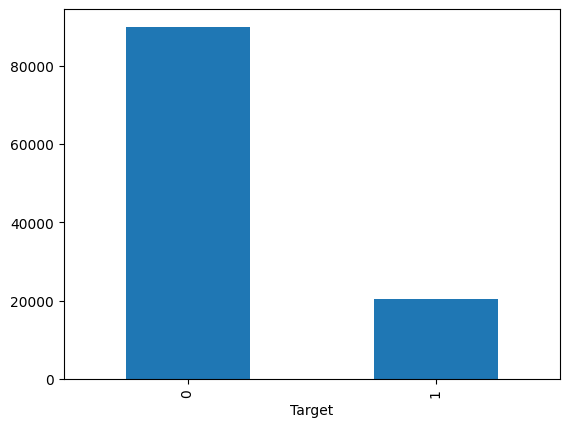

In [ ]:
new.Target.value_counts().plot(kind = "bar")
plt.show()

In [ ]:
new.head()

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_YR,HC_PD,HC_EM,HC_EYR,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target
0,489652,6578,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,Third,G,2,278.0,59,-25.0,312,253,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0,16,8,2005,14,10,2005,10,19,3,5,19,4,2837,11,11,1
1,507246,6578,45,5,0,0,7,1.0,75.0,40.0,C,Others,NaN,Third,G,2,344.0,59,-2.0,401,342,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0,16,8,2005,14,10,2005,10,19,3,5,19,4,2837,26,26,0
2,523729,6534,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Second,A,2,676.0,751,-194.0,1233,482,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0,17,10,2005,7,11,2007,5,19,4,8,9,6,3597,7,7,1
3,524931,6535,0,0,0,0,0,NaN,NaN,NaN,I,NaN,NaN,First,E,2,0.0,17,-6.0,11,-6,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0,1,2,2004,18,2,2004,6,16,3,6,14,8,1882,6,6,0
4,521364,6529,15,1,0,0,7,1.0,70.0,40.0,I,Technology,NaN,Second,A,2,970.0,4,30.0,1004,1000,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0,30,3,2006,3,4,2006,1,21,4,5,18,1,3823,23,23,1


In [ ]:
# Check if there is any relation between Categories and target
import scipy.stats as stats
cats = ["Category1", "Category2", "Category3"]

for i in cats:
  tbl = pd.crosstab(new.loc[:, i], new.Target)
  teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
  print(f'{i} : pvalue = {pvalue}')

Category1 : pvalue = 0.0
Category2 : pvalue = 0.0
Category3 : pvalue = 0.0003699935082811574


In [ ]:
# Health Camps as per Category 2
new["Magic3"]=new.groupby("Category2")\
 ["Health_Camp_ID"].transform('nunique')

new["Magic4"]=new.groupby("Category1")\
 ["Health_Camp_ID"].transform('nunique')

new["Magic5"]=new.groupby("Category3")\
 ["Health_Camp_ID"].transform('nunique')

In [ ]:
# Patients...
new["Magic6"]=new.groupby("Category2")\
 ["Patient_ID"].transform('nunique')

new["Magic7"]=new.groupby("Category1")\
 ["Patient_ID"].transform('nunique')

new["Magic8"]=new.groupby("Category3")\
 ["Patient_ID"].transform('nunique')

In [ ]:
# Deal with Categories
new["Category1"] = pd.factorize(new.Category1)[0]
new["Category2"] = pd.factorize(new.Category2)[0]
new["Category3"] = pd.factorize(new.Category3)[0]

In [ ]:
# Check Variables 1 to 5
cats = ["Var1", "Var2", "Var3", "Var4", "Var5"]

for i in cats:
  tbl = pd.crosstab(new.loc[:, i], new.Target)
  teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
  print(f'{i} : pvalue = {pvalue}')

# We cannot drop any of the Var(s)

Var1 : pvalue = 6.838846288318711e-53
Var2 : pvalue = 3.787050514205909e-32
Var3 : pvalue = 0.006578836766342602
Var4 : pvalue = 0.012219232918294767
Var5 : pvalue = 2.7350892211054783e-63


In [ ]:
new.head()

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_YR,HC_PD,HC_EM,HC_EYR,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8
0,489652,6578,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,278.0,59,25.0,312,253,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0,16,8,2005,14,10,2005,10,19,3,5,19,4,2837,11,11,1,10,10,62,13614,13614,36527
1,507246,6578,45,5,0,0,7,1.0,75.0,40.0,C,Others,NaN,0,0,0,344.0,59,2.0,401,342,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0,16,8,2005,14,10,2005,10,19,3,5,19,4,2837,26,26,0,10,10,62,13614,13614,36527
2,523729,6534,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,676.0,751,194.0,1233,482,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0,17,10,2005,7,11,2007,5,19,4,8,9,6,3597,7,7,1,7,11,62,11415,15426,36527
3,524931,6535,0,0,0,0,0,NaN,NaN,NaN,I,NaN,NaN,2,2,0,0.0,17,6.0,11,6,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0,1,2,2004,18,2,2004,6,16,3,6,14,8,1882,6,6,0,15,44,62,15397,27282,36527
4,521364,6529,15,1,0,0,7,1.0,70.0,40.0,I,Technology,NaN,1,1,0,970.0,4,30.0,1004,1000,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0,30,3,2006,3,4,2006,1,21,4,5,18,1,3823,23,23,1,7,11,62,11415,15426,36527


In [ ]:
# Convert negative into Positive Days
new["Magic1"] = np.abs(new["Magic1"])
new["Waiting_Period"] = np.abs(new["Waiting_Period"])

In [ ]:
def incomeCat(x):
  if x:
    return(1)
  else:
    return(0)

In [ ]:
new["Income_Cat"] = new.Income.apply(incomeCat)

In [ ]:
tbl = pd.crosstab(new.Income_Cat, new.Target)
teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
print(f'pvalue = {pvalue}')

pvalue = 1.6485636833558644e-32


In [ ]:
new.Income.fillna(new.Income.median(), inplace = True)

In [ ]:
tbl = pd.crosstab(new.Income, new.Target)
teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
print(f'pvalue = {pvalue}')

pvalue = 3.953425939987871e-153


In [ ]:
# Employer_Category
new["Employer_Category"] = pd.factorize(new.Employer_Category)[0]
new["City_Type"] = pd.factorize(new.City_Type)[0]
new["Education_Score"] = pd.factorize(new.Education_Score)[0]

In [ ]:
new.Age.fillna(new.Age.median(), inplace = True)

In [ ]:
# Dropping the columns
new.drop(['Donation', 'Regn_Days','Regn_Month', 'Regn_Year',
          'CS_Days', 'CS_Month', "CS_Year", 'CS_EDays', 'CS_EMonth',
          'CS_EYear', "Patient_ID", "Health_Camp_ID"], axis = 1,
         inplace = True)

In [ ]:
new.isnull().sum()[new.isnull().sum()!=0].index

Index(['Interaction_Days', 'Magic1', 'Magic2', 'PerMonth_Regn', 'PerYear_Regn',
       'PerDay_Regn'],
      dtype='object')

In [ ]:
missed = ['Interaction_Days', 'Magic1',
          'Magic2', 'PerMonth_Regn', 'PerYear_Regn','PerDay_Regn']

for i in missed:
  new[i].fillna(new[i].median(), inplace = True)

### Modelling

In [ ]:
# Split the Data into train and test
newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

newtest.drop("Target", axis = 1, inplace = True)
newtrain.shape, newtest.shape, train.shape, test.shape

((75278, 41), (35249, 40), (75278, 8), (35249, 8))

In [ ]:
# SMOTE
X = newtrain.drop("Target", axis = 1)
y = newtrain.Target

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority", random_state = 0)
smote_x, smote_y = smote.fit_resample(X, y)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

dtree = DecisionTreeClassifier(random_state = 0)
tree_pred = []

for train_index, test_index in kfold.split(smote_x, smote_y):
  X_train= smote_x.iloc[train_index]
  y_train = smote_y.iloc[train_index]
  tree_pred.append(dtree.fit(X_train, y_train).predict_proba(newtest))

In [ ]:
submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]

In [ ]:
submission.to_csv("Dtree.csv", index = False) # 0.6295210

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

rf = RandomForestClassifier(random_state = 0)
tree_pred = []

for train_index, test_index in kfold.split(smote_x, smote_y):
  X_train= smote_x.iloc[train_index]
  y_train = smote_y.iloc[train_index]
  tree_pred.append(rf.fit(X_train, y_train).predict_proba(newtest))

In [ ]:
submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]
submission.to_csv("RF.csv", index = False) # 0.74

In [ ]:
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gbm = GradientBoostingClassifier(random_state = 0)
tree_pred = []

for train_index, test_index in kfold.split(smote_x, smote_y):
  X_train= smote_x.iloc[train_index]
  y_train = smote_y.iloc[train_index]
  tree_pred.append(gbm.fit(X_train, y_train).predict_proba(newtest))

In [ ]:
submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]
submission.to_csv("GBM.csv", index = False) # 0.75311

In [ ]:
from xgboost import XGBClassifier
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

xgbm = XGBClassifier(random_state = 0)
tree_pred = []

for train_index, test_index in kfold.split(smote_x, smote_y):
  X_train= smote_x.iloc[train_index]
  y_train = smote_y.iloc[train_index]
  tree_pred.append(xgbm.fit(X_train, y_train).predict_proba(newtest))

In [ ]:
submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]
submission.to_csv("XGBM.csv", index = False) # 0.7556

In [ ]:
from lightgbm import LGBMClassifier
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lgbm = LGBMClassifier(random_state = 0)
tree_pred = []

for train_index, test_index in kfold.split(smote_x, smote_y):
  X_train= smote_x.iloc[train_index]
  y_train = smote_y.iloc[train_index]
  tree_pred.append(lgbm.fit(X_train, y_train).predict_proba(newtest))

[LightGBM] [Info] Number of positive: 43795, number of negative: 43795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3013
[LightGBM] [Info] Number of data points in the train set: 87590, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 43795, number of negative: 43795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3020
[LightGBM] [Info] Number of data points in the train set: 87590, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

In [ ]:
submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]
submission.to_csv("LGBM.csv", index = False) # 0.7578

In [ ]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [ ]:
# prompt: library for catboost and code for fitting
from catboost import CatBoostClassifier

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

catboost = CatBoostClassifier(random_state=0, verbose=0)
# set verbose to 0 to suppress training output
tree_pred = []

for train_index, test_index in kfold.split(smote_x, smote_y):
  X_train = smote_x.iloc[train_index]
  y_train = smote_y.iloc[train_index]
  tree_pred.append(catboost.fit(X_train, y_train).predict_proba(newtest))

submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]
submission.to_csv("CatBoost.csv", index = False) # 0.755

In [ ]:
modelperf = pd.DataFrame({"Dtree":[0.62], "Random_Forest":[0.74],
                          "GBM": [0.75311], "XGB":[0.7556],
                          "LGBM":[0.7578], "CATBoost":[0.755]})

In [ ]:
modelperf

,Dtree,Random_Forest,GBM,XGB,LGBM,CATBoost
0,0.62,0.74,0.75311,0.7556,0.7578,0.755


### Stacking Classifier

* Based on Above Performance, we will make LGBM as our Meta Model

* Remaining Models can be my base models

In [ ]:
from sklearn.ensemble import StackingClassifier

base_learners = [
    ("RF", RandomForestClassifier()),
    ("GBM", GradientBoostingClassifier()),
    ("XGB", XGBClassifier())]

# Define the Meta Model
meta_model = LGBMClassifier()

# Define the Stacking Model
stack = StackingClassifier(estimators=base_learners,
                           final_estimator=meta_model, cv = 5,
                           stack_method='predict_proba')

tree_pred = stack.fit(X_train, y_train).predict_proba(newtest)

submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
                           "Health_Camp_ID":test.Health_Camp_ID})
submission["Outcome"] = pd.DataFrame(tree_pred)[1]
submission.to_csv("Stack.csv", index = False) # 0.755

AttributeError: 'super' object has no attribute '__sklearn_tags__'